# Fully-connected Networks for Number Recognition

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

# Prepare the data

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (784,)

# flatten the data from 28*28 to 1*784
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 
x_test = x_test.astype("float32") / 255 


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


# Build the model

In [4]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [5]:
batch_size=128
epochs=12

model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

history = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.2)


Epoch 1/12
375/375 [==============================] - 2s 3ms/step - loss: 0.5536 - accuracy: 0.8356 - val_loss: 0.2870 - val_accuracy: 0.9202
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.3037 - accuracy: 0.9127 - val_loss: 0.2834 - val_accuracy: 0.9213
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2909 - accuracy: 0.9181 - val_loss: 0.2831 - val_accuracy: 0.9216
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2816 - accuracy: 0.9218 - val_loss: 0.2760 - val_accuracy: 0.9239
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2769 - accuracy: 0.9245 - val_loss: 0.2783 - val_accuracy: 0.9252
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2764 - accuracy: 0.9229 - val_loss: 0.2752 - val_accuracy: 0.9252
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2786 - accuracy: 0.9231 - val_loss: 0.2779 - val_accuracy: 0.9254
Epoch 

# Plot the training history 

In [6]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


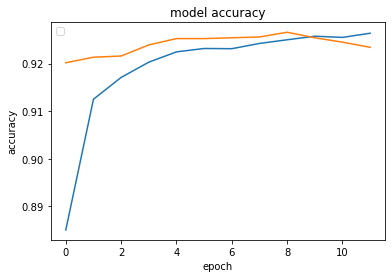

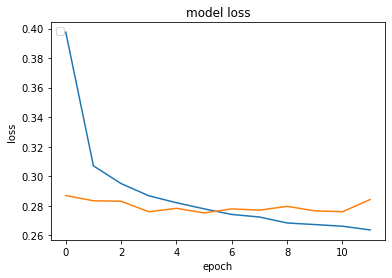

In [7]:
# summarize history for accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# summarize history for loss


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# Evaluate the trained model

In [8]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.2904048264026642
Test accuracy: 0.9197999835014343


# Changing model parameters: Add rectified activation function

In [9]:

# add rectified activation in the first hidden layer
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,), activation = 'relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
batch_size=128
epochs=12

model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

history = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.2)


Epoch 1/12
375/375 [==============================] - 1s 3ms/step - loss: 0.5284 - accuracy: 0.8521 - val_loss: 0.1813 - val_accuracy: 0.9467
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1502 - accuracy: 0.9546 - val_loss: 0.1416 - val_accuracy: 0.9586
Epoch 3/12
375/375 [==============================] - 1s 3ms/step - loss: 0.1004 - accuracy: 0.9707 - val_loss: 0.1021 - val_accuracy: 0.9688
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0745 - accuracy: 0.9791 - val_loss: 0.1020 - val_accuracy: 0.9699
Epoch 5/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0569 - accuracy: 0.9841 - val_loss: 0.0841 - val_accuracy: 0.9762
Epoch 6/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0441 - accuracy: 0.9876 - val_loss: 0.0834 - val_accuracy: 0.9747
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0345 - accuracy: 0.9904 - val_loss: 0.0852 - val_accuracy: 0.9738
Epoch 

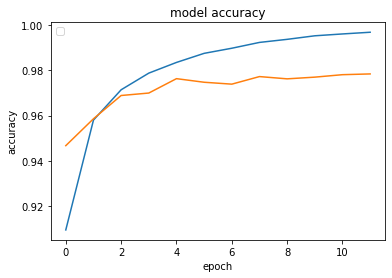

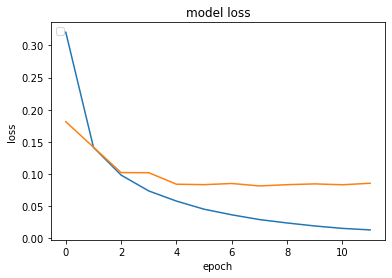

In [11]:
# summarize history for accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# summarize history for loss


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# What is the effect for generalisation?

how this training history differs from the previous model, for the training and validation sets. Describe what this tells us about the generalisation of the model.

The non-linear model 2 performs significantly better than the first model. The validation loss from Model 1 (0.2844) decreases significantly (0.0847) and the model accuracy increases by almost 5%. Still there was quite the gap between the validation and the training data, showing that both models even though they were imporved


Overall, Orange seems stable and coherent to the training set, so it is a great model.

# Image show the Training Image

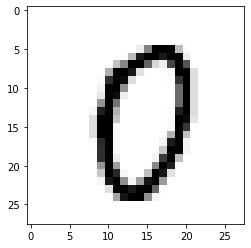

In [12]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

n = 1000
plt.imshow(x_train[n], cmap='Greys')

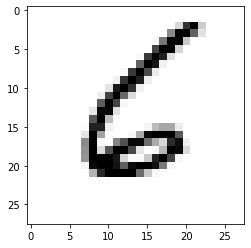

In [13]:
n = 10101
plt.imshow(x_train[n], cmap='Greys')

# Check the prediction value

In [14]:
inputs = x_test[1]
print(inputs.shape)

# inputs = np.expand_dims(inputs,-1)
x = inputs.reshape(1,784)
print(x.shape)

(28, 28)
(1, 784)


In [15]:
for i in range(10):
    x = x_test[i].reshape(1,784)
    y = model.predict(x)
    print(y)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [16]:
for i in range(10):
    x = x_test[i].reshape(1,784)    
    y = np.argmax(model.predict(x), axis=-1)
    print(i,y)

0 [7]
1 [2]
2 [1]
3 [0]
4 [4]
5 [1]
6 [4]
7 [9]
8 [5]
9 [9]


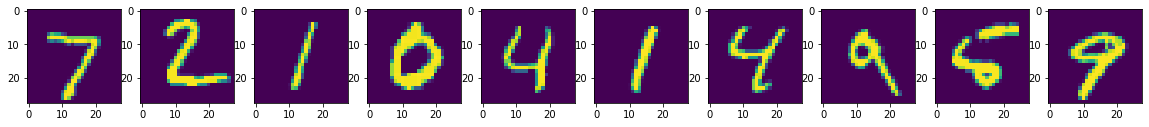

In [17]:
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow
from keras.preprocessing.image import img_to_array, array_to_img

# random fake img
# img = np.random.random(size=(100, 100, 3))

columns = 5
plt.figure(figsize=(20,10))

for i in range(10):
    x = x_test[i].reshape(28,28)
    x = np.expand_dims(x,-1)
    pil_img = array_to_img(x)
    
    plt.subplot(5, 10, i + 1)
    plt.imshow(pil_img)

# ploting the model architecture

In [19]:
# ploting the model architecture

# pip install pydot

from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
